# Customer Car Purchase Prediction by watching Advertisement on Social Media

Here we used Social_network_Ads dataset which providing information regarding the person's age and estimated salary & if he/she is interested in buying a car by watching an advertisement on Social Network.(yes=1,No=0)
we will predict that what are the chances of new person of some age to be interested in buying car by watching the same Social Media Advertisement.

In [108]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from statistics import stdev

# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# importing voting classifier
from sklearn.ensemble import VotingClassifier

In [109]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/DiogenesXXX/BDx/main/car_data2.csv')

dataset.drop(dataset.columns[[0]], axis=1, inplace=True)

X = dataset.iloc[:, [0, 1, 2]].values
y = dataset.iloc[:, 3].values

In [110]:
dataset.describe()

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.484000,40.106000,72689.000000,0.402000
std,0.499994,10.707073,34488.341867,0.490547
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,32.000000,46375.000000,0.000000
50%,0.000000,40.000000,72000.000000,0.000000
75%,1.000000,48.000000,90000.000000,1.000000
max,1.000000,63.000000,152500.000000,1.000000


In [111]:
dataset["Gender"].value_counts()

0    516
1    484
Name: Gender, dtype: int64

In [112]:
dataset["Age"].value_counts()


38    48
40    46
42    44
36    44
41    42
35    38
39    37
49    33
37    32
48    32
43    30
27    29
47    28
28    25
50    24
45    23
26    22
29    22
31    22
46    22
30    21
32    20
60    19
51    19
33    18
44    17
52    17
59    16
34    15
25    15
53    15
24    15
20    14
58    14
55    13
61    13
54    12
19    12
57    12
21    11
56    11
23    11
22     9
63     7
62     6
18     5
Name: Age, dtype: int64

In [113]:
dataset["AnnualSalary"].value_counts()


81500     18
73500     17
76500     14
80500     12
62500     12
          ..
94500      1
139000     1
104500     1
117500     1
101000     1
Name: AnnualSalary, Length: 247, dtype: int64

In [114]:
dataset["Purchased"].value_counts()


0    598
1    402
Name: Purchased, dtype: int64

In [115]:
dataset.groupby(['Age', 'Purchased']).mean()

,,Gender,AnnualSalary
Age,Purchased,,
18,0,0.400000,66400.000000
19,0,0.583333,55125.000000
20,0,0.571429,54607.142857
21,0,0.454545,62409.090909
22,0,0.444444,54888.888889
...,...,...,...
60,1,0.529412,74000.000000
61,1,0.461538,71576.923077
62,0,0.000000,44500.000000


In [116]:
dataset.groupby(['Age', 'Purchased']).std()

,,Gender,AnnualSalary
Age,Purchased,,
18,0,0.547723,18297.540818
19,0,0.514929,26849.856103
20,0,0.513553,27434.662642
21,0,0.522233,26118.784602
22,0,0.527046,27481.559474
...,...,...,...
60,1,0.514496,38009.456060
61,1,0.518875,37597.565388
62,0,NaN,NaN


In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        1000 non-null   int64
 1   Age           1000 non-null   int64
 2   AnnualSalary  1000 non-null   int64
 3   Purchased     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


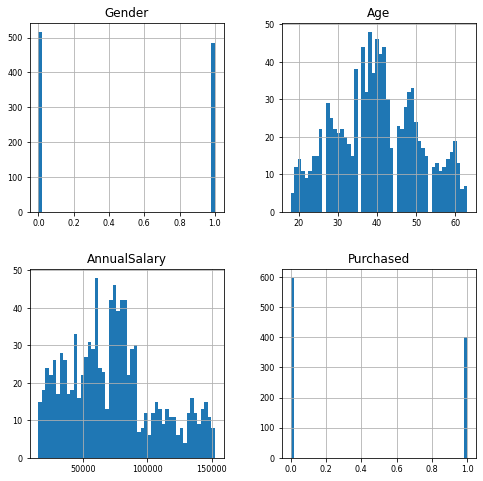

In [118]:
dataset.hist(figsize=(8, 8), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

## Splitting the Dataset and Feature Scaling

In [119]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [120]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 1)Logistic Regression

In [121]:
# fitting logistic regresion to the training set
from sklearn.linear_model import LogisticRegression
classi = LogisticRegression(random_state = 0)
classi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [122]:
#predict the test set results
y_pred = classi.predict(X_test)

In [123]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       152
           1       0.85      0.74      0.79        98

    accuracy                           0.85       250
   macro avg       0.85      0.83      0.84       250
weighted avg       0.85      0.85      0.85       250



In [124]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [125]:
print(cm)    #confusion Matrix

[[139  13]
 [ 25  73]]


In [126]:
from statistics import stdev

classi_Recall = recall_score(y_test, y_pred)
classi_Precision = precision_score(y_test, y_pred)
classi_f1 = f1_score(y_test, y_pred)
classi_accuracy = accuracy_score(y_test, y_pred)

score = cross_val_score(classi, X_train, y_train, cv=5, scoring='recall')
classi_cv_score = score.mean()
classi_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', classi_cv_score)
print('Cross Validation Recall standard deviation: ', classi_cv_stdev)


Cross Validation Recall scores are: [0.65       0.72131148 0.68852459 0.70491803 0.73770492]
Average Cross Validation Recall score:  0.7004918032786887
Cross Validation Recall standard deviation:  0.03365450398192318


## 2) K_nearest neighbors[KNN]


In [127]:
# fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classi1 = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
classi1.fit(X_train, y_train)

KNeighborsClassifier()

In [128]:
#predict the test set results
y_pred1 = classi1.predict(X_test)

In [129]:
# Classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       152
           1       0.86      0.87      0.86        98

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [130]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[138  14]
 [ 13  85]]


In [131]:
classi1_Recall = recall_score(y_test, y_pred1)
classi1_Precision = precision_score(y_test, y_pred1)
classi1_f1 = f1_score(y_test, y_pred1)
classi1_accuracy = accuracy_score(y_test, y_pred1)

score = cross_val_score(classi1, X_train, y_train, cv=5, scoring='recall')
classi1_cv_score = score.mean()
classi1_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', classi1_cv_score)
print('Cross Validation Recall standard deviation: ', classi1_cv_stdev)

Cross Validation Recall scores are: [0.85       0.90163934 0.90163934 0.96721311 0.85245902]
Average Cross Validation Recall score:  0.8945901639344263
Cross Validation Recall standard deviation:  0.047793281915885624


## 3) Decision tree classification

In [132]:
# fitting classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classi2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classi2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [133]:
#predict the test set results
y_pred2 = classi2.predict(X_test)

In [134]:
# Classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       152
           1       0.86      0.81      0.83        98

    accuracy                           0.87       250
   macro avg       0.87      0.86      0.86       250
weighted avg       0.87      0.87      0.87       250



In [135]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[139  13]
 [ 19  79]]


In [136]:
classi2_Recall = recall_score(y_test, y_pred2)
classi2_Precision = precision_score(y_test, y_pred2)
classi2_f1 = f1_score(y_test, y_pred2)
classi2_accuracy = accuracy_score(y_test, y_pred2)

score = cross_val_score(classi2, X_train, y_train, cv=5, scoring='recall')
classi2_cv_score = score.mean()
classi2_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', classi2_cv_score)
print('Cross Validation Recall standard deviation: ', classi2_cv_stdev)

Cross Validation Recall scores are: [0.75       0.85245902 0.78688525 0.90163934 0.83606557]
Average Cross Validation Recall score:  0.8254098360655737
Cross Validation Recall standard deviation:  0.058793979804686224


## 4) random forest classification

In [137]:
# fitting random forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classi3 = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 0)
classi3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [138]:
#predict the test set results
y_pred3 = classi3.predict(X_test)

In [139]:
# Classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       152
           1       0.88      0.81      0.84        98

    accuracy                           0.88       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.88      0.88       250



In [140]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[141  11]
 [ 19  79]]


In [141]:
classi3_Recall = recall_score(y_test, y_pred3)
classi3_Precision = precision_score(y_test, y_pred3)
classi3_f1 = f1_score(y_test, y_pred3)
classi3_accuracy = accuracy_score(y_test, y_pred3)

score = cross_val_score(classi3, X_train, y_train, cv=5, scoring='recall')
classi3_cv_score = score.mean()
classi3_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', classi3_cv_score)
print('Cross Validation Recall standard deviation: ', classi3_cv_stdev)

Cross Validation Recall scores are: [0.81666667 0.86885246 0.8852459  0.95081967 0.85245902]
Average Cross Validation Recall score:  0.8748087431693989
Cross Validation Recall standard deviation:  0.04950273797093337


## 5) Support Vector Machine (SVM) classification

In [142]:
# fitting SVM to the training set
from sklearn.svm import SVC
classi4 = SVC(kernel='rbf', random_state = 0)
classi4.fit(X_train, y_train)


SVC(random_state=0)

In [143]:
#predict the test set results
y_pred4 = classi4.predict(X_test)

In [144]:
# Classification report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       152
           1       0.87      0.88      0.87        98

    accuracy                           0.90       250
   macro avg       0.89      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [145]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)

In [146]:
print(cm4)

[[139  13]
 [ 12  86]]


In [147]:
classi4_Recall = recall_score(y_test, y_pred4)
classi4_Precision = precision_score(y_test, y_pred4)
classi4_f1 = f1_score(y_test, y_pred4)
classi4_accuracy = accuracy_score(y_test, y_pred4)

score = cross_val_score(classi4, X_train, y_train, cv=5, scoring='recall')
classi4_cv_score = score.mean()
classi4_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', classi4_cv_score)
print('Cross Validation Recall standard deviation: ', classi4_cv_stdev)

Cross Validation Recall scores are: [0.83333333 0.8852459  0.95081967 0.93442623 0.86885246]
Average Cross Validation Recall score:  0.894535519125683
Cross Validation Recall standard deviation:  0.04809053641244108


## 6) Naive bayes

In [148]:
# fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
classi5 = GaussianNB()
classi5.fit(X_train, y_train)

GaussianNB()

In [149]:
#predict the test set results
y_pred5 = classi5.predict(X_test)

In [150]:
# Classification report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       152
           1       0.86      0.83      0.84        98

    accuracy                           0.88       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.88      0.88       250



In [151]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[139  13]
 [ 17  81]]


In [152]:
classi5_Recall = recall_score(y_test, y_pred5)
classi5_Precision = precision_score(y_test, y_pred5)
classi5_f1 = f1_score(y_test, y_pred5)
classi5_accuracy = accuracy_score(y_test, y_pred5)

score = cross_val_score(classi5, X_train, y_train, cv=5, scoring='recall')
classi5_cv_score = score.mean()
classi5_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', classi5_cv_score)
print('Cross Validation Recall standard deviation: ', classi5_cv_stdev)

Cross Validation Recall scores are: [0.73333333 0.81967213 0.86885246 0.7704918  0.83606557]
Average Cross Validation Recall score:  0.8056830601092896
Cross Validation Recall standard deviation:  0.053810017015988885


### Voting Classifier for Better Results

In [153]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# importing voting classifier
from sklearn.ensemble import VotingClassifier

model_1 = LogisticRegression(random_state = 0)
model_2 = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
model_3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_4 = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 0)
model_5 = SVC(kernel='rbf', random_state = 0)
model_6 = GaussianNB()

estimator = []
estimator.append(('LogisticRegression', model_1))
estimator.append(('KNeighborsClassifier', model_2))
estimator.append(('DecisionTreeClassifier', model_3))
estimator.append(('RandomForestClassifier', model_4))
estimator.append(('SVC', model_5))
estimator.append(('GaussianNB', model_6))


## Voting Classifier with hard voting

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

VC_hard = VotingClassifier(estimators = estimator, voting ='hard')
VC_hard.fit(X_train, y_train)
y_pred6 = VC_hard.predict(X_test)

# 5.1 Classification report
print(classification_report(y_test, y_pred6))


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       152
           1       0.87      0.84      0.85        98

    accuracy                           0.89       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.89      0.89      0.89       250



In [155]:
# 5.2 Confusion matrix
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)

[[140  12]
 [ 16  82]]


In [156]:
from statistics import stdev

VC_hard_Recall = recall_score(y_test, y_pred6)
VC_hard_Precision = precision_score(y_test, y_pred6)
VC_hard_f1 = f1_score(y_test, y_pred6)
VC_hard_accuracy = accuracy_score(y_test, y_pred6)

score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='recall')
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.75       0.86885246 0.8852459  0.93442623 0.83606557]
Average Cross Validation Recall score:  0.8549180327868852
Cross Validation Recall standard deviation:  0.06855419393477515


In [157]:
ndf = [( VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_cv_score, VC_hard_cv_stdev),
       ( classi_Recall, classi_Precision, classi_f1, classi_accuracy, classi_cv_score, classi_cv_stdev),
       ( classi1_Recall, classi1_Precision, classi1_f1, classi1_accuracy, classi1_cv_score, classi1_cv_stdev),
       ( classi2_Recall, classi2_Precision, classi2_f1, classi2_accuracy, classi2_cv_score, classi2_cv_stdev),
       ( classi3_Recall, classi3_Precision, classi3_f1, classi3_accuracy, classi3_cv_score, classi3_cv_stdev),
       ( classi4_Recall, classi4_Precision, classi4_f1, classi4_accuracy, classi4_cv_score, classi4_cv_stdev),
       ( classi5_Recall, classi5_Precision, classi5_f1, classi5_accuracy, classi5_cv_score, classi5_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_hard_score.insert(0, 'Voting Classifier', ('Hard Voting','LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB'))
VC_hard_score

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Hard Voting,0.836735,0.872340,0.854167,0.888,0.854918,0.068554
1,LogisticRegression,0.744898,0.848837,0.793478,0.848,0.700492,0.033655
2,KNeighborsClassifier,0.867347,0.858586,0.862944,0.892,0.894590,0.047793
3,DecisionTreeClassifier,0.806122,0.858696,0.831579,0.872,0.825410,0.058794
4,RandomForestClassifier,0.806122,0.877778,0.840426,0.880,0.874809,0.049503
5,SVC,0.877551,0.868687,0.873096,0.900,0.894536,0.048091
6,GaussianNB,0.826531,0.861702,0.843750,0.880,0.805683,0.053810
